In [3]:
#First we import our required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# We import our data, that is in the same folder
# variable_name = pd.read_csv({path_to_csv})
data = pd.read_csv("housing.csv")

Data Exploration
(Get details about the DB, nulls/NA treatment)

In [5]:
#data        #shows the DB
#data.shape  #rows,col
data.info() #summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data_cleaned = data.dropna().copy() #As there are 207 null values, we can drop them as it is 1% of the DB
                                    # We copy the cleaned data into a new DF (data_cleaned)
data_cleaned.shape

(20433, 10)

In [8]:
#List the columns for a clearer view of them
list(data_cleaned.columns.values)
# or simply list(data_cleaned)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

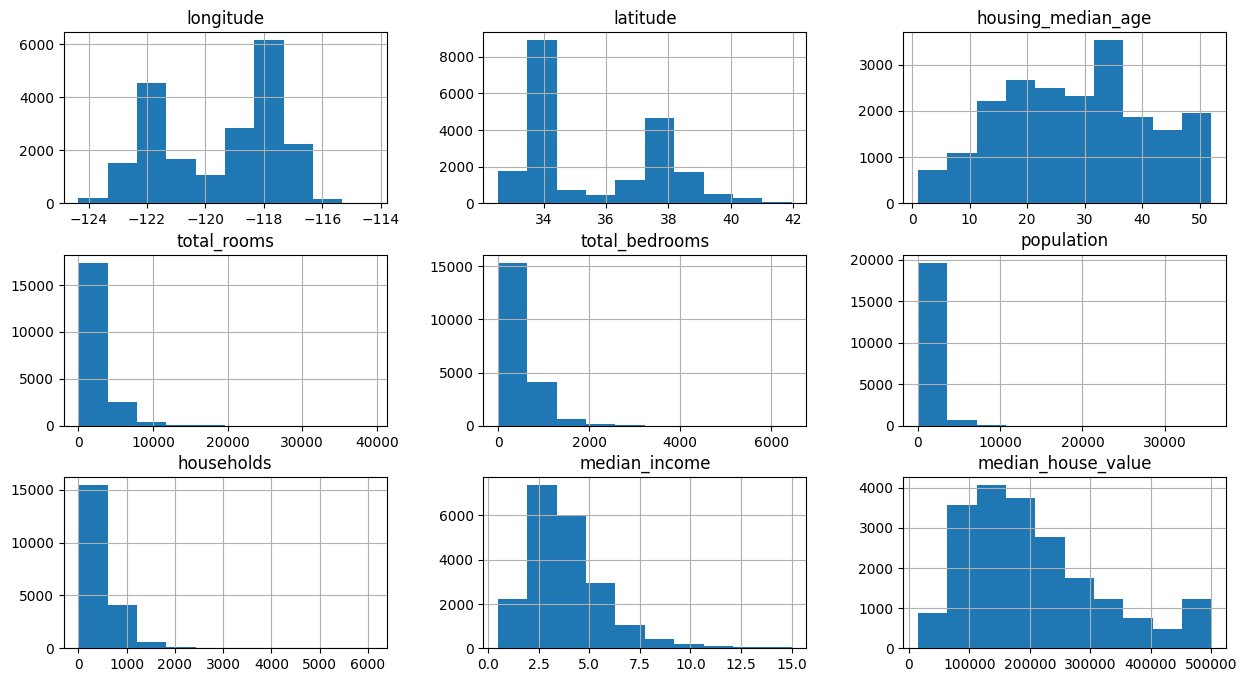

In [9]:
data_cleaned.hist(figsize=(15,8)) #Quick check 

# HeatMap
Now, we need to see which variables (or columns) have a **correlation** with our target variable we can simply use {data}.corr for that, but a picture is worth a thousand words, for that, **seaborn** comes into play for making a heatmap

## Important:
As we have non numerical values (column = 'ocean_proximity') we could have changed those columns to a numeric value if we are interested in those, for this case we are just going to ignore them adding 'numeric_only=True' to corr()

<Axes: >

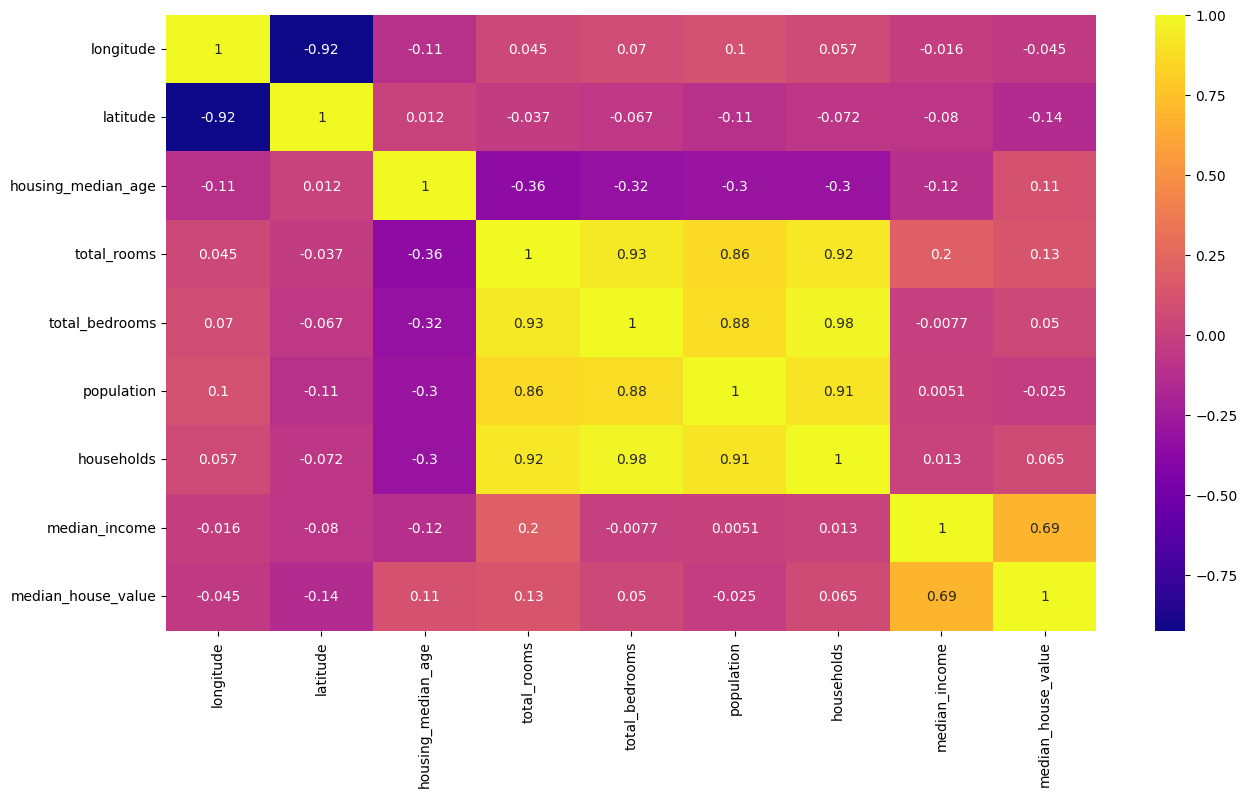

In [10]:
#data_cleaned.corr(numeric_only=True)          #correlation between variables (linear correlation) shown in a matrix, 1 is max correlation, 
                                            #1 normally means "same column", as it is logical that the same column will have a 100% 
                                            # correlation with itself  
plt.figure(figsize=(15,8)) #I want to see them better, original size was too small, numbers overlapping
sns.heatmap(data_cleaned.corr(numeric_only=True), annot=True, cmap="plasma") 
#annot=True is because i want to see the correlation coefficient for each

# Data Pre-processing

## Normalization

As the data has a right skewness (seen on  ```train_data.hist(figsize=(15,8))```), we have to _"normalize it"_ using logaritmic functions for it. As a normal way for this is doing replacing the values of {data} with {log(data+1)} so we won't have problems with zero values, I have to look this video [Log Transformation for Outliers | Convert Skewed data to Normal Distribution](https://www.youtube.com/watch?v=YCwRd-N3D14) to have a better explanation of this. I should talk in another notebook about data processing, as there are several ways to "normalize" data

In [11]:
data_cleaned.loc[:,'total_rooms'] = np.log(data_cleaned['total_rooms'] + 1)
data_cleaned.loc[:,'total_bedrooms'] = np.log(data_cleaned['total_bedrooms'] + 1)
data_cleaned.loc[:,'population'] = np.log(data_cleaned['population'] + 1)
data_cleaned.loc[:,'households'] = np.log(data_cleaned['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

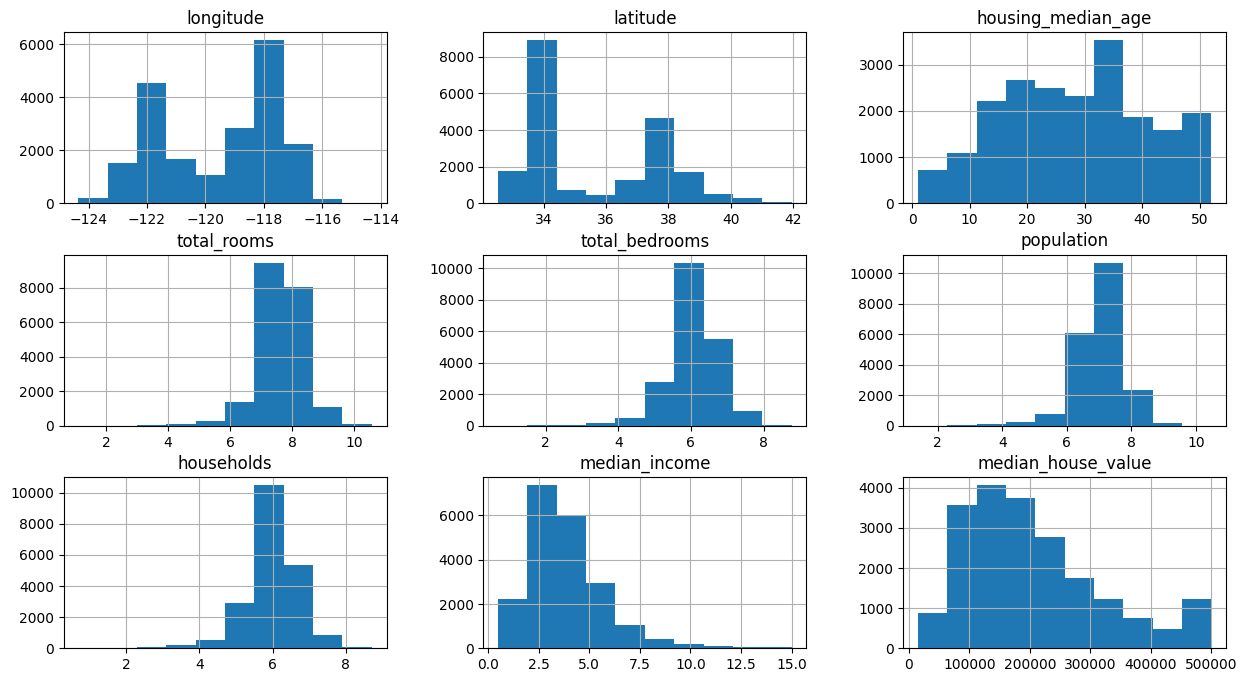

In [12]:
data_cleaned.hist(figsize=(15,8))

As we can see, the graphs of those four columns have changed and follow a more gaussian distribution (total_rooms, total_bedrooms, population and households) (Please refer to the previous histogram plotted)

### What about the categorical feature ```ocean_proximity```?

For previous analysis, the categorical feature wasn't considered, as I ran corr(numeric_only=True), but having a look into that column, the proximity of a house to the ocean in florida should have an impact in the target variable (median_house_value), so, in order to evaluate a categorical feature, we need to transform the feature into numbers, for this case, I'm going to create a new column for each value also known as dummies and "one-hot encoding". For that, we need to know which values exist on it.

In [13]:
data_cleaned.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

Five values on ```ocean_proximity```, so we run get_dummies of pandas (blessed be pandas)

In [14]:
pd.get_dummies(data_cleaned.ocean_proximity)
print(pd.get_dummies(data_cleaned.ocean_proximity).dtypes) #We check the type, we have booleans, we can change them into binary values on next line
dummyframe = pd.get_dummies(data_cleaned.ocean_proximity).astype(int)
dummyframe

<1H OCEAN     bool
INLAND        bool
ISLAND        bool
NEAR BAY      bool
NEAR OCEAN    bool
dtype: object


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


- Add the new columns to train_data
- Eliminate (or drop) the column ocean_proximity as we already have the same values

In [15]:
data_cleaned = data_cleaned.join(dummyframe).drop(['ocean_proximity'], axis = 1) #axis 1 = column

In [16]:
data_cleaned.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0     6.781058        4.867534   
1        -122.22     37.86                21.0     8.867850        7.009409   
2        -122.24     37.85                52.0     7.291656        5.252273   
3        -122.25     37.85                52.0     7.150701        5.463832   
4        -122.25     37.85                52.0     7.395108        5.638355   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0     7.418181        5.926926   
20636    -121.21     39.49                18.0     6.548219        5.017280   
20637    -121.22     39.43                17.0     7.720905        6.186209   
20638    -121.32     39.43                18.0     7.528869        6.016157   
20639    -121.24     39.37                16.0     7.932362        6.424869   

       population  

<Axes: >

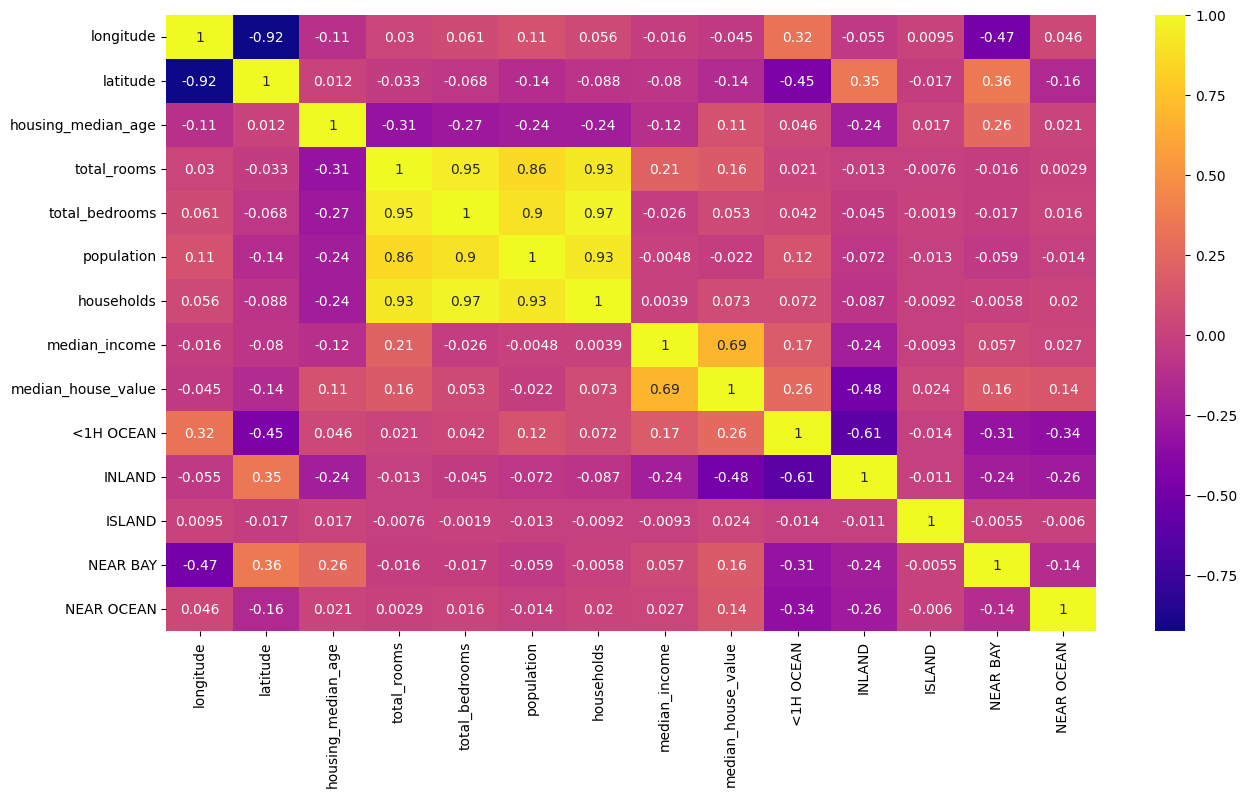

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='plasma')

In the heatmap we can see the correlation matrix, the ones close to zero means no correlation at all, and the ones close to |1| indicates correlation. A parameter will have perfect (1) correlation to itself, as we can see in the diagonal 1 shown in the matrix

<Axes: xlabel='longitude', ylabel='latitude'>

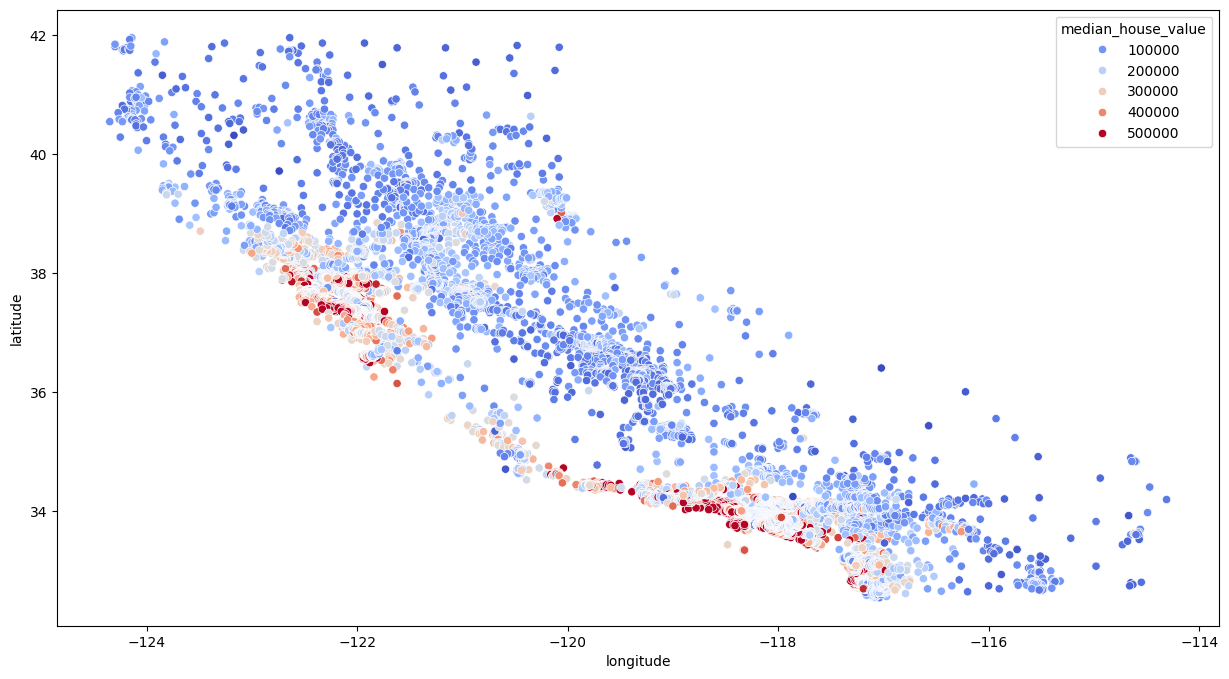

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', data=data_cleaned, hue='median_house_value', palette = 'coolwarm')

Scatterplot to see any tendencies in geographical area. Also we can see that the red dots corresponds to the seashore and has a tendency of be overpriced compared to the other ones

![Map image](/_images/Captura%20de%20pantalla%202024-09-27%20005620.png "San Francisco Map")

## Feature Engineering

Mix variables

- How many bedrooms do we have per room
- Number of rooms per household on houses

In [19]:
data_cleaned['bedroom_ratio'] = data_cleaned['total_bedrooms']/data_cleaned['total_rooms']
data_cleaned['households_rooms'] = data_cleaned['total_rooms']/data_cleaned['households']

<Axes: >

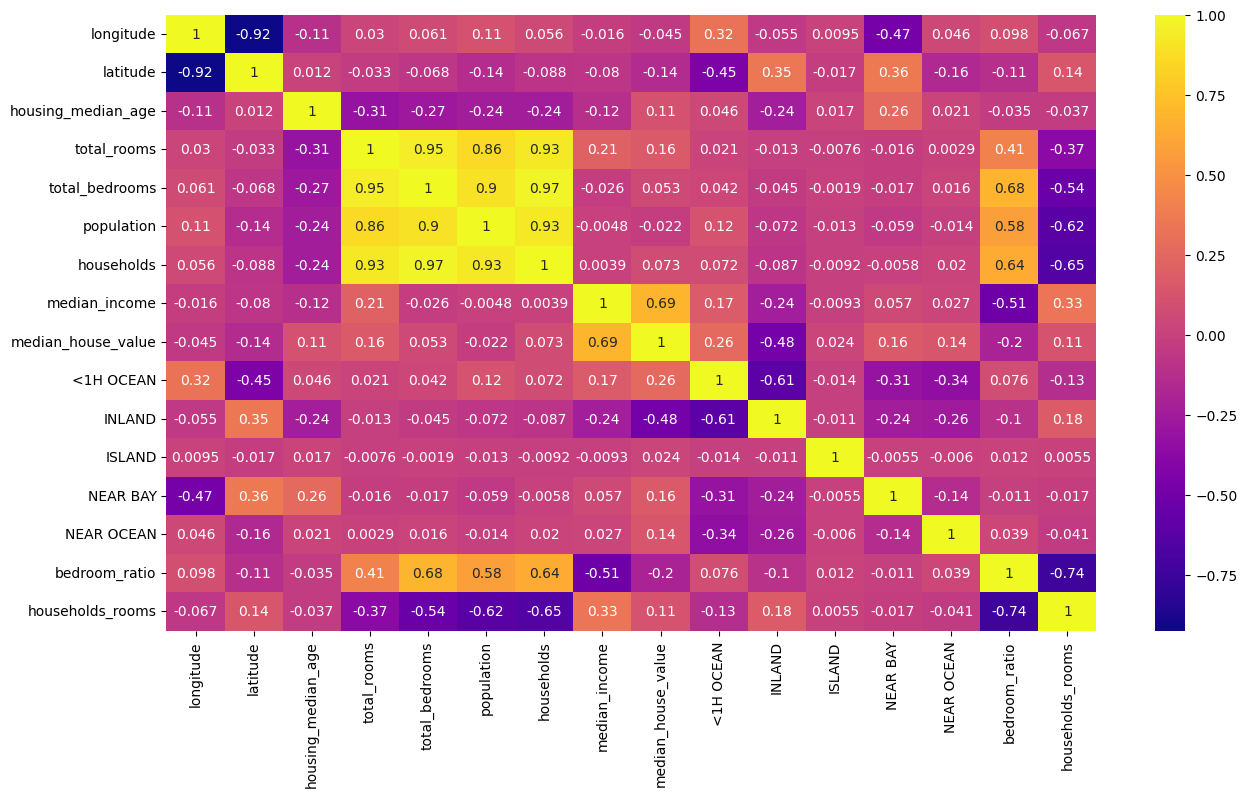

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='plasma')

Many many variables, should take out some of them, but for the sake of fidelity with the model, I'm going to let it as it is (I Already took out 1% of data with the NA/null handling at the beggining)

# Preparation for modelling
Now we separate into X and y variables, where X is the dataset without the target variable ('median_house_value' for this case), and y is only the target variable

In [21]:
from sklearn.model_selection import train_test_split    #we import from sklearn to split the data

X = data_cleaned.drop(['median_house_value'], axis=1)   #Here we create variable 'X' with all the data BUT the target variable, 
                                                        #it is inside a list because drop() can take multiple arguments in a list
                                                        #(We can drop many columns/rows at once). For axis: 0=rows and 1=columns
                                                        # if not, default is ROWS
y = data_cleaned['median_house_value']                  #For 'y' we just select the target variable

# Split time!
Creation of variable_train, variable_test for X and y by train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    #Test size, as its name indicates, 
                                                                            #is the part that is untouched, for testing later
                                                                            # 1 for 100%, should be around 0.15/0.25

In [23]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [24]:
reg.score(X_test, y_test)

0.6622444269715035

Meh, all this for **66.8% accuracy** on my model, anyways is just a linear regression, the most basic aproximation for prediction.
### Let's try RandomForest

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
forest.score(X_test, y_test)

0.8015219964110195

Way better! 80,6% but anyways, if we want to tune the model, we have tweak some parameters (GridSearch comes into play)

In [28]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

Best estimator for RandomForest is the max of the values given in the param_grid, that means we should keep looking for higher values, anyways, we should check the acc of the new model with those parameters

In [34]:
#in case you are not able to see the output, here it is again
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [30]:
#we input that values into a variable, and run the model
best_forest = grid_search.best_estimator_
best_forest.score(X_test, y_test)

0.8026119344700245

Our Model has decreased its accuracy! (From 80,6% to 80,2%) we need to tweak the param_grid

In [37]:
forest = RandomForestRegressor()

#As we added more parameters, the search for the best parameter values will take more time, be patient
#It took 15' on my computer

param_grid = {
    'n_estimators': [30,60,120],
    'max_features': [8,12,20],
    'min_samples_split': [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\flpga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 60, 120]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_search.best_estimator_

RandomForestRegressor(max_features=12, n_estimators=120)

So now, having our best parameters (features = 12 and n_estimators = 120) we'll run again the model in the same way as before. This is, load the parameters intop a variable and then check for the model score

In [39]:
best_forest = grid_search.best_estimator_
best_forest.score(X_test, y_test)

0.8093478544937779

So, after tweaking the parameters, our model has improved an overall of 0,3% from the first Random Forest Run. 
What we should do;
- Remove some features in the model
- Increase the estimators up to 300
- Keep the features around 12 (6-18)
- Compare

So now, to be more concrete, I asked Claude 3.5 to compare predictions with the actual prices, all below is AI generated

In [35]:
# Make a prediction
# First, let's select a sample from our test set
sample = X_test.iloc[0]  # Taking the first row of X_test as an example

# Reshape the sample to match the input shape expected by the model
sample = sample.values.reshape(1, -1)

# Make the prediction
prediction = best_forest.predict(sample)

print(f"Predicted house value: ${prediction[0]:,.2f}")

# Let's compare it with the actual value
actual_value = y_test.iloc[0]
print(f"Actual house value: ${actual_value:,.2f}")

# Calculate the difference
difference = abs(prediction[0] - actual_value)
percentage_diff = (difference / actual_value) * 100

print(f"Difference: ${difference:,.2f}")
print(f"Percentage difference: {percentage_diff:.2f}%")

# You can also make predictions for multiple samples at once
# For example, let's predict for the first 5 samples in X_test
multiple_samples = X_test.iloc[:5]
multiple_predictions = best_forest.predict(multiple_samples)
multiple_actual_values = y_test.iloc[:5]

print("\nPredictions for 5 samples:")
for i, (pred, actual) in enumerate(zip(multiple_predictions, multiple_actual_values)):
    print(f"Sample {i+1}: Predicted: ${pred:,.2f}, Actual: ${actual:,.2f}")


Predicted house value: $117,986.67
Actual house value: $118,500.00
Difference: $513.33
Percentage difference: 0.43%

Predictions for 5 samples:
Sample 1: Predicted: $117,986.67, Actual: $118,500.00
Sample 2: Predicted: $167,193.33, Actual: $125,200.00
Sample 3: Predicted: $157,223.33, Actual: $131,100.00
Sample 4: Predicted: $233,000.03, Actual: $236,500.00
Sample 5: Predicted: $183,023.33, Actual: $173,900.00


C:\Users\flpga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
